# All Metrics and Calculations 

## Introductions 
Our project’s goal is to find the safest neighborhood in Pittsburgh using different data through the WPRDC website. We believe what determines the safest neighborhood is a neighborhood with the least crime rate. If you live in a place with fear of robberies, gun violence, or other crimes, I do not think that should be considered your home. Your neighborhood should be a place that nurtures development and good practices.  This is why we decided to use 911 dispatches, police arrest, and accidental overdoses as our metrics to determine the safest neighborhood. NOTE: Some of our results are in the greater pittsburgh area and we received permission from Professor Graham to use these results. 


## Metrics 
We believe, our metrics as described above, gives us the best representation of the worst neighborhoods to live in as the police arrests, overdoses, and 911 dispatches would be considerably high in bad neighborhoods. With that being said, our goal was to find the zip code or neighborhood with the least amount of the metrics used. 


# Metric #1:  Accidental Overdoses 
## Danish Ghumman


In [ ]:
https://data.wprdc.org/dataset/allegheny-county-fatal-accidental-overdoses

In [1]:
# all imports needed 
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt



In [2]:
# Importing Data
fatalfile= pd.read_csv("fatal_overdoses.csv")

fatalfile.head(10)

fatal_in_neighborhood = dict()

for index, row in fatalfile.iterrows():
    fatal = row['manner_of_death']


In [4]:
#creating a small table of zipcode and amount of deaths per zipcode
typeOf = fatalfile['incident_zip'].value_counts()

typeOf.head(50)



15210    329
15212    270
15136    199
15132    187
15235    179
15216    168
15221    158
15227    158
15206    142
15205    138
15219    135
15120    132
15202    121
15108    120
15106    119
15226    113
15211    112
15236    108
15025     92
15201     89
15146     88
15207     86
15122     85
15214     84
15237     84
15147     81
15203     81
15209     77
15204     74
15104     72
15224     70
15215     69
15220     67
15223     65
15208     64
15234     63
15084     62
15102     58
15218     55
15110     53
15229     52
15239     50
15044     49
15213     49
15137     49
15065     48
15145     46
15068     46
15045     46
15222     45
Name: incident_zip, dtype: int64

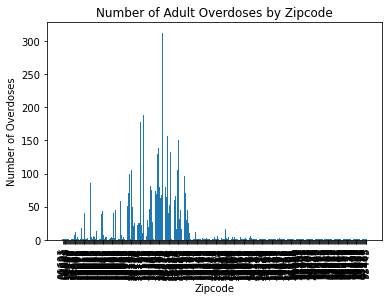

In [5]:

# Load the data from CSV file
data = pd.read_csv('fatal_overdoses.csv')

# Filter data to only include adult overdose cases
adult_data = data[data["age"] >= 25]

# Group data by zipcode and count the number of cases
zipcode_data = adult_data.groupby("incident_zip")["incident_zip"].count().reset_index(name='Overdose Cases')

# Create a bar plot of the data
plt.bar(zipcode_data["incident_zip"], zipcode_data["Overdose Cases"])
plt.xlabel("Zipcode")
plt.ylabel("Number of Overdoses")
plt.title("Number of Adult Overdoses by Zipcode")

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.show()


# Metric 2: Ems and Fire dispatches

## Samih Irfan

In [10]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
#import data for EMS dispatch
dispatch = pd.read_csv("dispatch.csv")
dispatch.head(10)

,_id,call_id_hash,service,priority,priority_desc,call_quarter,call_year,description_short,city_code,city_name,geoid,census_block_group_center__x,census_block_group_center__y
0,600,00033E4C9F648F70F32101CDDD90A4,EMS,E4,EMS Basic Life Support Assistance response (i....,Q2,2015.0,FIRE ALARM RES BLDG,NFT,NORTH FAYETTE,4.200345e+14,-80.216294,40.445904
1,1392636,00046EF7C3B16600260B80E847964A,EMS,E0,EMS Advanced Life Support life threatening res...,Q1,2022.0,Removed,CLA,CLAIRTON,4.200349e+14,-79.885864,40.288014
2,609,00064937D69052FE0D85A37D099C6B,EMS,E2,EMS Standard Advanced Life Support response,Q1,2019.0,SICK,PGH,PITTSBURGH,4.200328e+14,-80.051463,40.444939
3,12,0007CBA42D483A4C726B058FF95A90,EMS,E3,EMS Standard Basic Life Support response,Q1,2019.0,SICK,ALE,ALEPPO,4.200356e+14,-80.142334,40.528896
4,252,0007F665BBBC635C05C69619CD0082,EMS,E5,All administrative mark outs,Q4,2018.0,NON EMERGENCY TRANSPORT,MCK,MCKEESPORT,4.200355e+14,-79.846635,40.349298
5,21,000D9A76DDF44501BBCC45607E58EE,EMS,E0,EMS Advanced Life Support life threatening res...,Q4,2015.0,Removed,COL,COLLIER,4.200346e+14,-80.101098,40.403822
6,2025,000DA61ABD7BABE3F0EF4CA7B62F5A,EMS,E4,EMS Basic Life Support Assistance response (i....,Q4,2016.0,NATURAL GAS ISSUE,SWS,SWISSVALE,4.200352e+14,-79.888900,40.421849
7,339,000E800AE1518FDD9EFCCD4BC7F34D,EMS,E2,EMS Standard Advanced Life Support response,Q1,2019.0,SICK,WHI,WHITEHALL,4.200348e+14,-79.997915,40.365407
8,354,000E993757DBF105C4509D2BD1959C,EMS,E2,EMS Standard Advanced Life Support response,Q2,2017.0,UNKNOWN,PGH,PITTSBURGH,4.200356e+14,-80.001260,40.454641
9,105,000AAB01E44BD2EB18D968A64880D8,EMS,E2,EMS Standard Advanced Life Support response,Q1,2019.0,SICK,MUN,MUNHALL,4.200348e+14,-79.901862,40.393525


Text(0, 0.5, 'Amount')

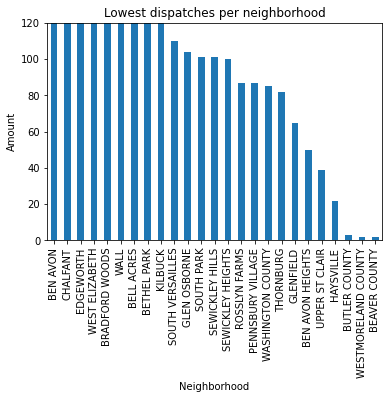

In [12]:
# Get data related to EMS dispatches within certain neighborhoods, then plot that data
rates = dispatch['city_name'].value_counts()
rates.tail(25).plot(kind="bar", ylim=[0,120])
plt.title("Lowest dispatches per neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Amount")

In [13]:
#import data for fire dispatch
dispatchFire = pd.read_csv("fireDispatch.csv")
dispatchFire.head(10)

,_id,call_id_hash,service,priority,priority_desc,call_quarter,call_year,description_short,city_code,city_name,geoid,census_block_group_center__x,census_block_group_center__y
0,681286,00053E1D7D8CB04C67AB7FBFC3EF00,Fire,Q0,EMS ALS life threatening response w/ backup,Q1,2023,EMS CALL/ASSIST,PGH,PITTSBURGH,4.200331e+14,-79.907531,40.365519
1,557010,00068B6737EFF7DD46E868A212DBA2,Fire,Q3,EMS Standard BLS response,Q3,2021,EMS ASSIST,PEN,PENN HILLS,4.200352e+14,-79.840209,40.460669
2,41,000946E89C992D701FCD071D9AC69B,Fire,F3,No threat to life safety.,Q4,2016,LOCKED OUT,PGH,PITTSBURGH,4.200301e+14,-79.975223,40.437450
3,42,0009968770473C212C6E8D20361BFF,Fire,F3,No threat to life safety.,Q4,2016,FIRE UNCATEGORIZED,BWB,BALDWIN BORO,4.200348e+14,-79.952712,40.380226
4,666863,67170DB78F8913B85E373D4A7C8347,Fire,F2,Incidents actively occurring or that has just ...,Q4,2022,Removed,CHU,CHURCHILL,4.200352e+14,-79.838461,40.431624
5,93459,304D4A48B571994CDF3350441F8631,Fire,F5,All administrative mark outs.,Q1,2019,DETAIL,MOO,MOON,4.200345e+14,-80.217761,40.489509
6,71434,304D8D5EFA6CDA2305EC26CF22D493,Fire,F3,No threat to life safety.,Q1,2016,RQST ASST FIRE,PGH,PITTSBURGH,4.200313e+14,-79.895308,40.456929
7,70776,304D9B8558909B974921716C408DA6,Fire,Q1,EMS ALS life threatening response,Q2,2018,EMS CALL/ASSIST,CRA,CRAFTON,4.200347e+14,-80.070048,40.439476
8,82529,304EC7BACB30A5CA5AC92B0C0C7660,Fire,Q0,EMS ALS life threatening response w/ backup,Q3,2019,EMS CALL/ASSIST,PGH,PITTSBURGH,4.200319e+14,-80.020426,40.410086
9,121,00021719386D53A394EBA1C7760E98,Fire,F2,Incidents actively occurring or that has just ...,Q1,2015,TRAFFIC - UNKNOWN STATUS,HSN,HARRISON,4.200340e+14,-79.726426,40.621716


Text(0, 0.5, 'Amount')

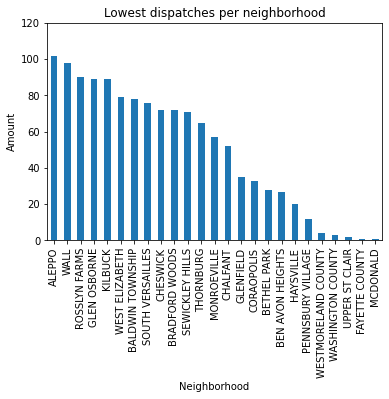

In [14]:
# Get data related to EMS dispatches within certain neighborhoods, then plot that data
rates = dispatchFire['city_name'].value_counts()
rates.tail(25).plot(kind="bar", ylim=[0,120])
plt.title("Lowest dispatches per neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Amount")

# Metric 3: Arrests

## Samih Irfan and Danish Ghumman

In [15]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [17]:
# Import data
police_arrests = pd.read_csv("Arrests.csv")

police_arrests.head(10)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
5,1974556,16144301,45.0,M,W,2016-08-15T13:30:00,"600 Block 1st AV Pittsburgh, PA 15219",3929 Retail Theft.,"800 Block Hazelwood AV Pittsburgh, PA 15217",Greenfield,4,1517.0,5.0,3.0,-79.929238,40.419699
6,1974628,16147655,29.0,M,W,2016-08-16T13:00:00,"2300 Block Pioneer AV Pittsburgh, PA 15226",2701 Simple Assault.,"2300 Block Pioneer AV Pittsburgh, PA 15226",Brookline,6,1919.0,4.0,5.0,-80.020357,40.400037
7,1974607,16146037,21.0,F,B,2016-08-16T04:25:00,"600 Block 1st AV Pittsburgh, PA 15219",2701 Simple Assault. / 5505 Public Drunkenness...,"700 Block S Braddock AV Pittsburgh, PA 15221",Regent Square,4,1410.0,NaN,NaN,-79.834462,40.398957
8,1974643,16132537,17.0,M,B,2016-08-29T17:55:00,"1400 Block Washington BL Pittsburgh, PA 15206",903 Criminal Conspiracy. / 3701 Robbery.,"N Euclid AV & Broad ST Pittsburgh, PA 15206",East Liberty,5,1115.0,NaN,NaN,NaN,NaN
9,1974647,16138646,14.0,M,B,2016-08-23T13:36:00,Zone 2,3127 Indecent Exposure. / 3123(a)(6) IDSI with...,Zone 5,NaN,5,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Amount')

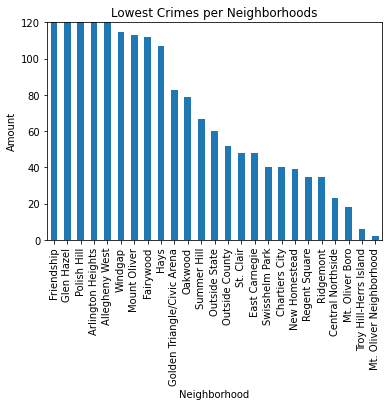

In [18]:
# Get data related to arrests within certain neighborhoods, then plot that data
rates = police_arrests['INCIDENTNEIGHBORHOOD'].value_counts()
rates.tail(25).plot(kind="bar", ylim=[0,120])
plt.title("Lowest Crimes per Neighborhoods")
plt.xlabel("Neighborhood")
plt.ylabel("Amount")

## Conclusion

Based on our data, we have found the upper st.clair, mount oliver, and duquesne are all great neighborhoods to live in as the reports of ems and fire dispatches, crimes, and accidental overdoses are all relatively low compared to other cities. I believe this is due to these neighborhoods being away from the main city. As neighborhoods get farther away from the city, all crime reports tend to get lower and this makes sense! There is less population and crowding, which in turn creates a community where everyone knows each other, making it harder to commit crimes without everyone finding out. I personally love Oakland as it is in the main city and there is always something to do. Although the cities above are the safest, I think there is nothing to do and will make it boring to live there. 
